In [1]:
from estilo import estructura_texto
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests
import re

In [11]:
link_pride = 'http://www.gutenberg.org/files/1342/1342.txt'
link_great = 'http://www.gutenberg.org/files/1400/1400-0.txt'

In [3]:
print(
    'Tamaño de Pride & Prejudice: ', len(pride), '\n'
    'Tamaño de Great Expectations: ', len(great)
    )

NameError: name 'pride' is not defined

In [123]:
#Muestra cuáles son distintos de cero
#np.where(lista_aux)

In [15]:
pride_df = estructura_texto(link_pride)
great_df = estructura_texto(link_great)

/anaconda/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2889: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)


In [16]:
pride_df.head(5)

,lon_parrafo,lon_palabra,lon_prom_oracion,total_punt
0,11,5.090909,11.00,1
1,44,4.636364,11.75,5
2,4,5.750000,4.00,1
3,3,5.666667,3.00,1
4,16,5.375000,16.00,10


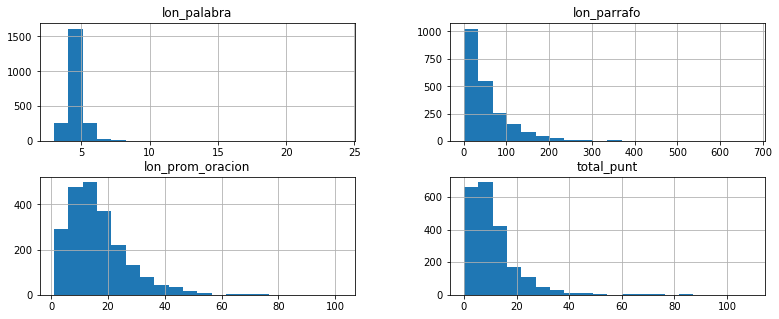

In [17]:
pride_df.hist(bins = 20, figsize = (13,5))
plt.show()

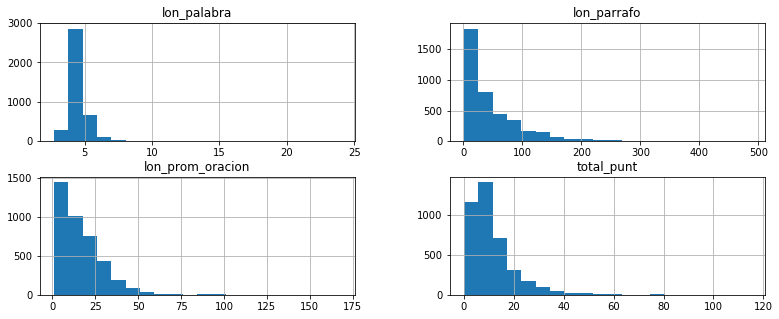

In [134]:
great_df.hist(bins = 20, figsize = (13,5))
plt.show()

In [18]:
df_autor = pd.concat([great_df.assign(autor = 'CD'), pride_df.assign(autor = 'JA')])

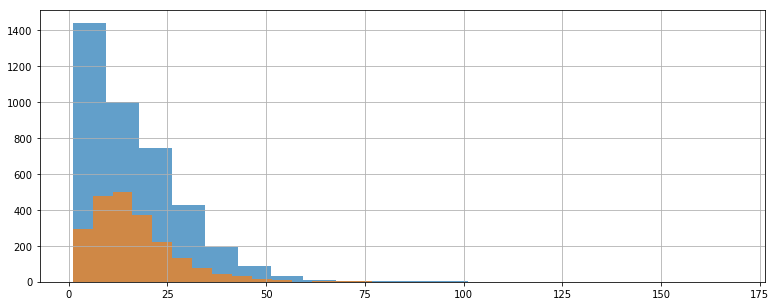

In [19]:
df_autor.groupby('autor')['lon_prom_oracion'].hist(bins = 20, figsize = (13,5), alpha = 0.7)
plt.show()

# Densidad

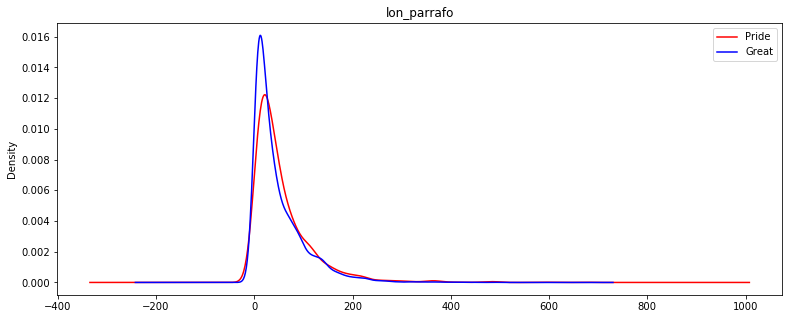

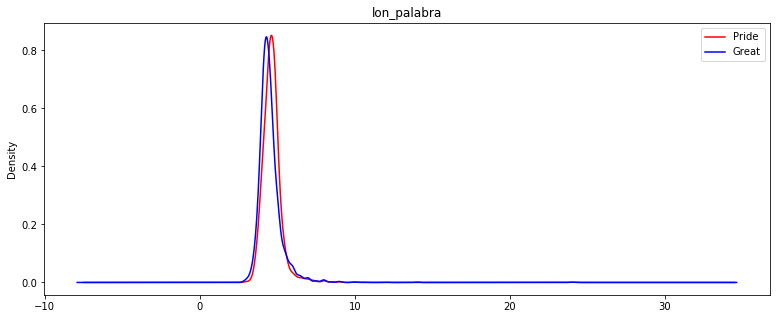

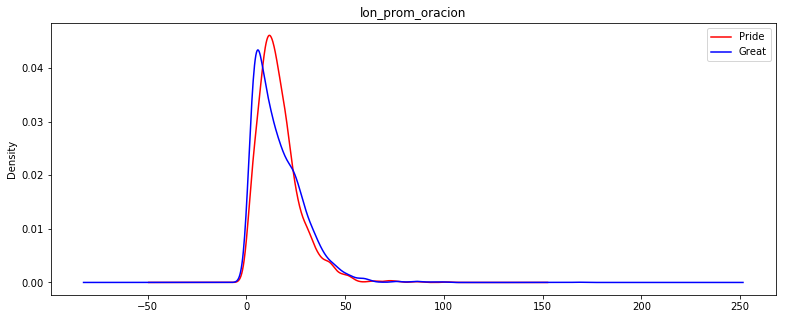

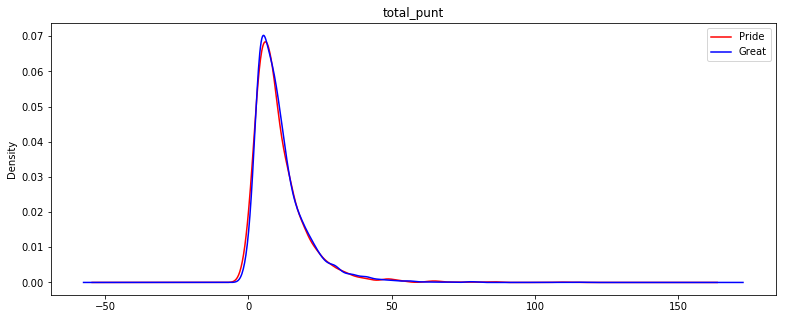

In [20]:
for col in pride_df.columns:
    pride_df[col].plot(color = 'r', label = 'Pride', kind = 'density', figsize = (13,5))
    great_df[col].plot(color = 'b', label = 'Great', kind = 'density')
    plt.title(col)
    plt.legend()
    plt.show()

## Histogramas

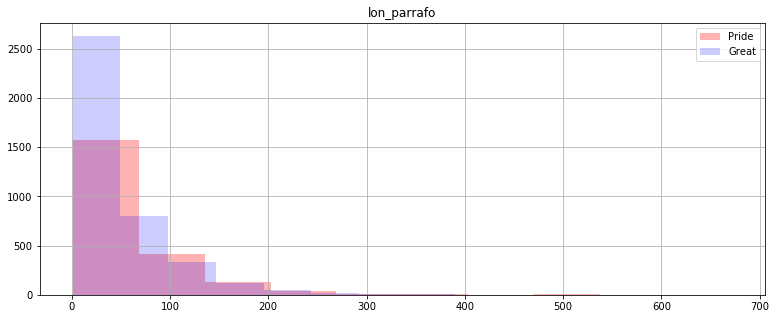

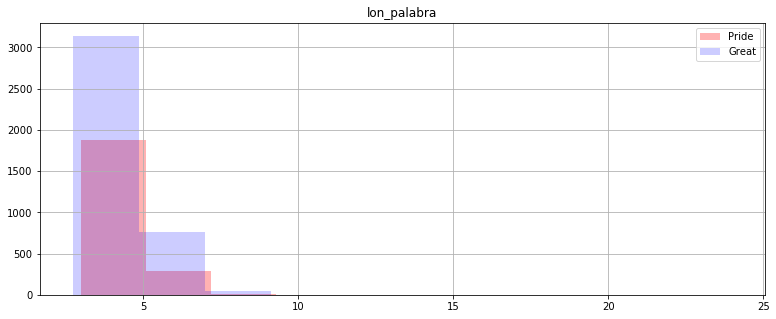

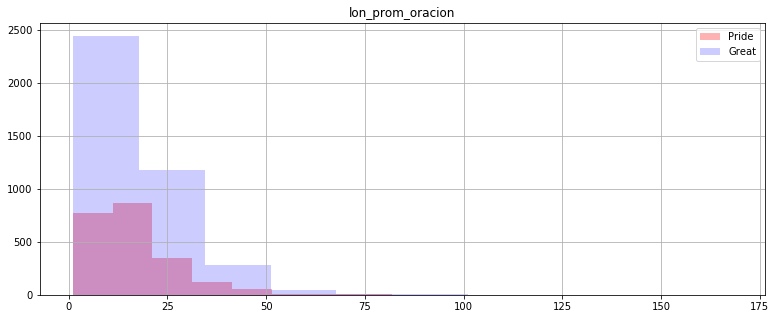

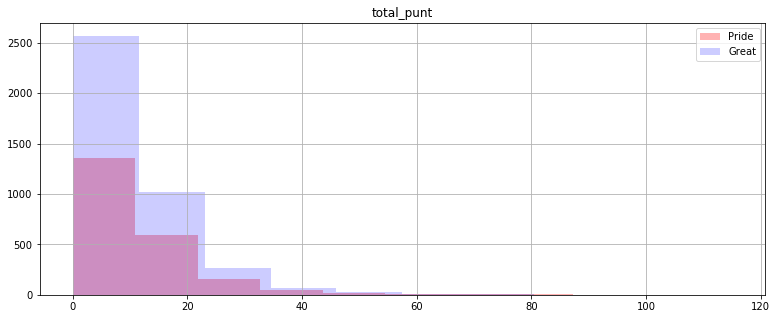

In [21]:
for col in pride_df.columns:
    pride_df[col].hist(color = 'r', label = 'Pride', figsize = (13,5), alpha = 0.3)
    great_df[col].hist(color = 'b', label = 'Great', alpha = 0.2)
    plt.title(col)
    plt.legend()
    plt.show()

## Outliers

In [22]:
mediana = np.percentile(pride_df['lon_prom_oracion'], 50)
mediana

14.5

In [24]:
print("Valores menores a la mediana: ", np.sum(pride_df['lon_prom_oracion'] < mediana))
print("Valores mayores a la mediana: ", np.sum(pride_df['lon_prom_oracion'] >= mediana))

Valores menores a la mediana:  1080
Valores mayores a la mediana:  1104


In [23]:
q1, q3 = np.percentile(pride_df['lon_prom_oracion'], [25, 75])
ext = [q1 - 1.5*(q3-q1), q3 + 1.5*(q3-q1)]
ext

[-9.2999999999999972, 39.5]

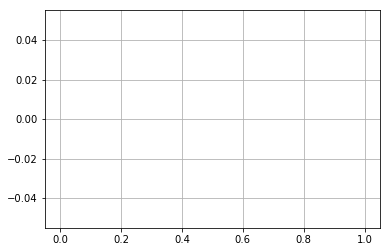

In [30]:
pride_df[pride_df['lon_prom_oracion'] < ext[0]]['lon_prom_oracion'].hist()
plt.show()

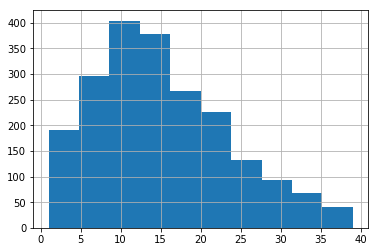

In [31]:
pride_df[pride_df['lon_prom_oracion'] < ext[1]]['lon_prom_oracion'].hist()
plt.show()

In [41]:
#Función que, dado un Series, regrese un Series de booleanos que sea verdadero si es outlier
def esOutlier(series):
    q1, q3 = np.percentile(series, [25, 75])
    ext = [q1 - 1.5*(q3-q1), q3 + 1.5*(q3-q1)]
    return (series < ext[0]) | (series > ext[1])

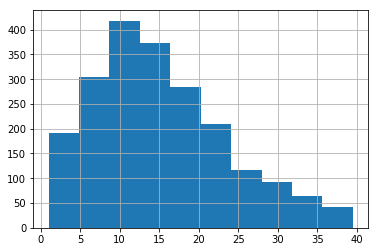

In [43]:
pride_df[~esOutlier(pride_df['lon_prom_oracion'])]['lon_prom_oracion'].hist()
plt.show()

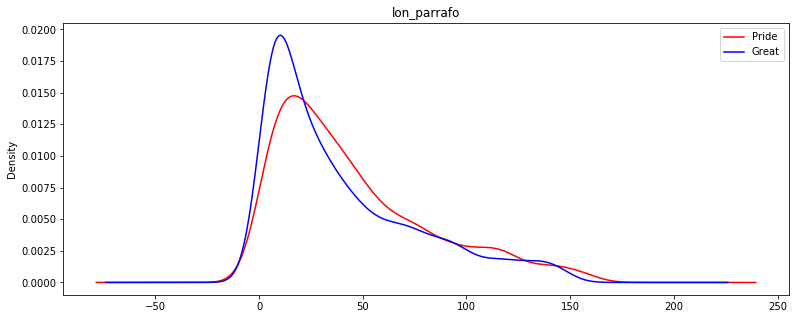

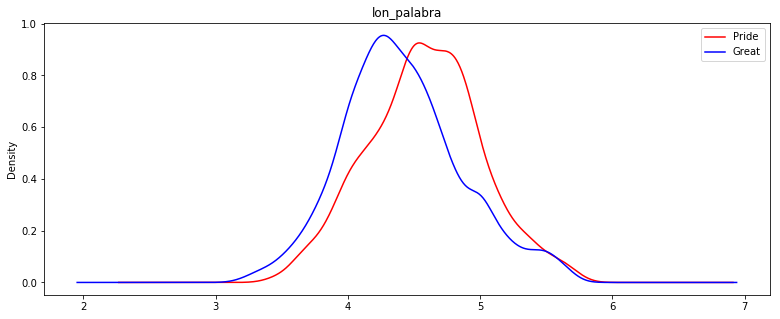

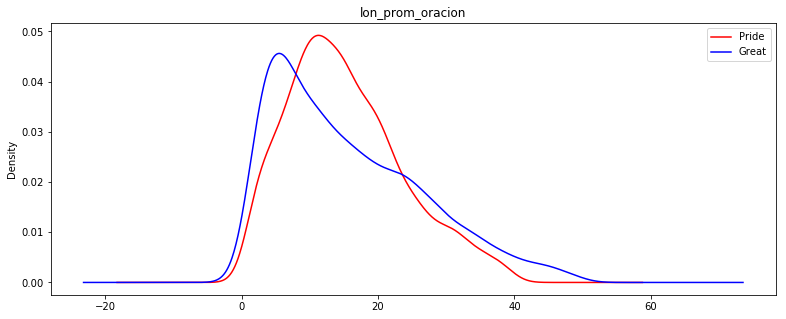

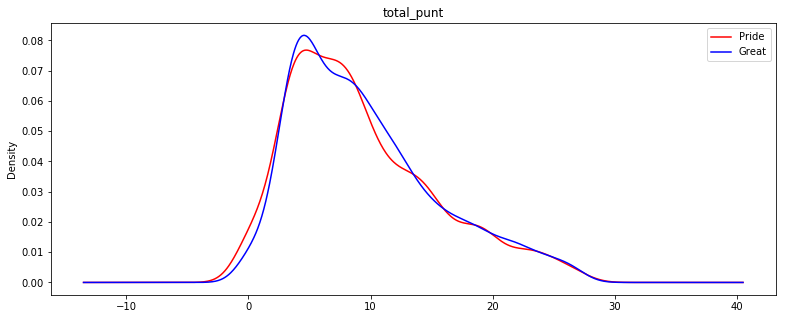

In [57]:
#Ejercicio: graficar distribuciones de Pride y Great sin outliers
for col in pride_df.columns:
    pride_df[~esOutlier(pride_df[col])][col].plot(color = 'r', label = 'Pride', kind = 'density', figsize = (13,5))
    great_df[~esOutlier(great_df[col])][col].plot(color = 'b', label = 'Great', kind = 'density')
    plt.title(col)
    plt.legend()
    plt.show()

**Ejercicio:** implementar código que vaya eliminando el outlier más alejado primero de manera secuencial

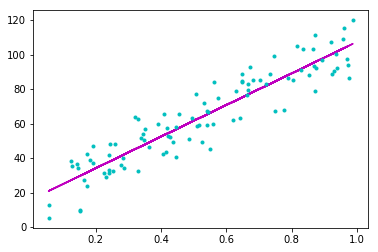

Número de outliers encontrados:  6


In [96]:
from scipy.stats import linregress
#Creo arreglos de valores (x,y) con un error normal
x = np.random.rand(100)
a = 10
b = 100
e = 10*np.random.randn(x.shape[0])
y = a + b*x + e
#Agrego outliers
x = np.append(x, [0.2, 0.8, 0.1, 0.9])
y = np.append(y, [80, 10, 100, 25])
#Obtengo regresión lineal de (x,y)
slope, intercept, r_value, p_value, std_err = linregress(x,y)
y_expected = intercept + slope*x
#Obtengo las distancias (y-y_expected)
err = abs(y - y_expected)
#Hago un ciclo que corre hasta que ya no haya más outliers y cuenta cuántos quitó
errn = esOutlier(err)
cont = 0
while errn.any():
    x = np.delete(x, np.argmax(err))
    y = np.delete(y, np.argmax(err))
    slope, intercept, r_value, p_value, std_err = linregress(x,y)
    y_expected = intercept + slope*x
    err = abs(y - y_expected)
    errn = esOutlier(err)
    cont += 1
plt.plot(x, y_expected, 'm')
plt.plot(x, y, 'c.')
plt.show()
print("Número de outliers encontrados: ", cont)
